# **Name-Vikash Kumar Maheshwari**
# **Sales Prediction Using Python**
# **Oasis Infobyte**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('Advertising.csv')

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
data.shape

(200, 5)

In [11]:
data.drop(columns=['Unnamed: 0'],inplace=True)
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


<AxesSubplot:>

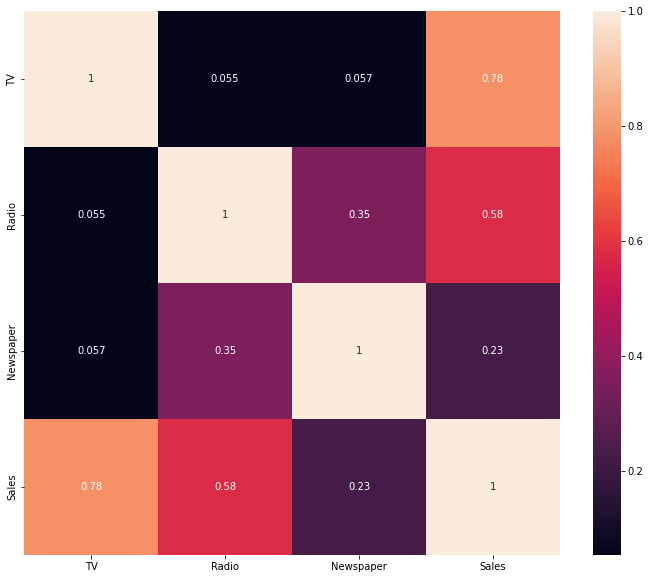

In [15]:
correlation=data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


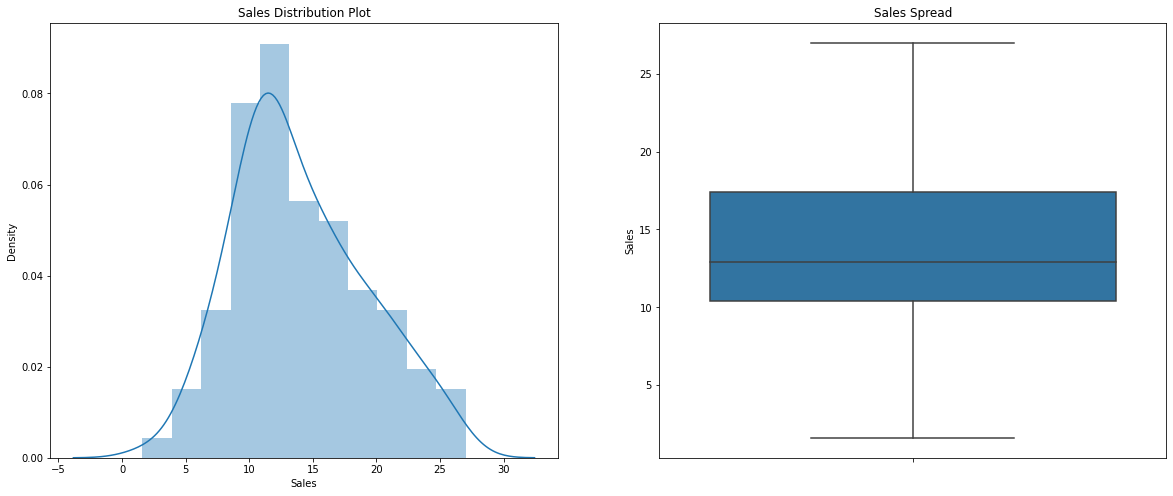

In [14]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Sales Distribution Plot')
sns.distplot(data['Sales'])

plt.subplot(1,2,2)
plt.title('Sales Spread')
sns.boxplot(y=data['Sales'])

plt.show()

In [16]:
x = np.array(data.drop(["Sales"], 1))
y = np.array(data["Sales"])

<ipython-input-16-a3ee2677f703>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = np.array(data.drop(["Sales"], 1))


In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [54]:
x_train

array([[116. ,   7.7,  23.1],
       [177. ,   9.3,   6.4],
       [ 43.1,  26.7,  35.1],
       [ 62.3,  12.6,  18.3],
       [224. ,   2.4,  15.6],
       [ 38.2,   3.7,  13.8],
       [ 70.6,  16. ,  40.8],
       [147.3,  23.9,  19.1],
       [104.6,   5.7,  34.4],
       [ 76.3,  27.5,  16. ],
       [ 78.2,  46.8,  34.5],
       [168.4,   7.1,  12.8],
       [  8.7,  48.9,  75. ],
       [  7.8,  38.9,  50.6],
       [ 76.4,   0.8,  14.8],
       [129.4,   5.7,  31.3],
       [ 73.4,  17. ,  12.9],
       [289.7,  42.3,  51.2],
       [ 19.6,  20.1,  17. ],
       [197.6,   3.5,   5.9],
       [284.3,  10.6,   6.4],
       [184.9,  21. ,  22. ],
       [112.9,  17.4,  38.6],
       [ 23.8,  35.1,  65.9],
       [290.7,   4.1,   8.5],
       [ 19.4,  16. ,  22.3],
       [293.6,  27.7,   1.8],
       [ 18.7,  12.1,  23.4],
       [134.3,   4.9,   9.3],
       [ 25.6,  39. ,   9.3],
       [100.4,   9.6,   3.6],
       [ 80.2,   0. ,   9.2],
       [188.4,  18.1,  25.6],
       [17

In [49]:
model = LinearRegression()
model.fit(x_train, y_train)
ypred = model.predict(xtest)

data = pd.DataFrame(data={"Predicted_Sales": ypred.flatten()})
print(data)

    Predicted_Sales
0         16.408024
1         20.889882
2         21.553843
3         10.608503
4         22.112373
5         13.105592
6         21.057192
7          7.461010
8         13.606346
9         15.155070
10         9.048320
11         6.653283
12        14.345545
13         8.903493
14         9.689590
15        12.164944
16         8.736284
17        16.265073
18        10.277596
19        18.831091
20        19.560367
21        13.251035
22        12.336207
23        21.306951
24         7.827403
25         5.809574
26        20.757532
27        11.981381
28         9.183496
29         8.506699
30        12.466468
31        10.003377
32        21.387671
33        12.249664
34        18.266615
35        20.137663
36        14.055140
37        20.854112
38        11.017444
39         4.568996


In [55]:
y_train

array([11. , 12.8, 10.1,  9.7, 11.6,  7.6, 10.5, 14.6, 10.4, 12. , 14.6,
       11.7,  7.2,  6.6,  9.4, 11. , 10.9, 25.4,  7.6, 11.7, 15. , 15.5,
       11.9,  9.2, 12.8,  6.6, 20.7,  6.7, 11.2,  9.5, 10.7,  8.8, 14.9,
       17.1, 15.9, 15.9, 15. , 20.7, 11.7, 21.8,  9.3, 14.2, 10.6, 17.3,
        9.9, 15.2, 13.3, 25.4, 10.8, 24.2,  5.6, 19.2, 23.8, 17.4, 17.4,
       17.3, 12.9, 11.8, 15.9, 15.5, 12.9,  9.6, 20.1, 10.3, 19.8, 11.4,
        8.6, 15.7, 14.1, 13.2,  8. , 22.1, 25.5, 19. , 18.3, 15.2, 18. ,
        8.5, 18. , 18.9, 16.6,  5.3,  3.2, 15.3, 12. , 15.5, 17.6, 25.4,
       12.3, 21.5, 17.1, 23.2, 11.5, 15.6, 12.9,  9.6, 18.5, 19.2, 21.2,
       19.6, 10.5, 11.8, 22.6,  9.7, 11.8,  9.5, 13.2, 13.4,  7.3, 13.6,
       20.2, 12.2, 16.7,  4.8,  9.7, 18.4, 14.5, 12.7, 24.4,  8.8, 27. ,
       10.8, 12.2, 26.2, 14. , 20.2,  8.7, 11.4,  9.7, 23.8, 14.8, 12.9,
       12.5, 13.2, 14.4,  5.9,  9.7, 14.7, 10.1, 19.6, 10.4, 22.6, 10.1,
        1.6, 11.6, 14.7, 17.2, 12.2, 16. , 17. ,  7

In [50]:
compare= pd.DataFrame({"y_test":list(y_test), "pred":list(ypred)})
compare.head()

,y_test,pred
0,16.9,16.408024
1,22.4,20.889882
2,21.4,21.553843
3,7.3,10.608503
4,24.7,22.112373


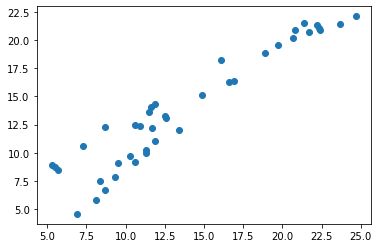

In [53]:
plt.scatter(y_test, ypred)
